<a href="https://colab.research.google.com/github/TheClassicTechno/shoethentic/blob/main/Shoe_Authenticity_Detector_Sire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

#processing images
path = '/content/drive/MyDrive/shoedataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


created by Julia Huang

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pathlib
import cv2
import glob
path = '/content/drive/MyDrive/shoedataset'
#processing images
real_path = path+ '/Real/*.png'
fake_path = path+ '/Fake/*.png'


#all images are 227x227 in RGB so 227, 227, 3
real_images = [cv2.imread(image) for image in glob.glob(real_path)]
fake_images = [cv2.imread(image) for image in glob.glob(fake_path)]




In [ ]:
real_images

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = "training",
    seed = 24,  
    image_size = (227, 227),
    batch_size = 32
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = "validation",
    seed = 24,  
    image_size = (227, 227),
    batch_size = 32
)

train_dataset = train_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)



Found 42 files belonging to 2 classes.
Using 34 files for training.
Found 42 files belonging to 2 classes.
Using 8 files for validation.


In [7]:
model = Sequential ([
    layers.Rescaling(1./255, input_shape = (227, 227, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(2)
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

model.fit (
    train_dataset, 
    validation_data = val_dataset,
    epochs = 70
)
model.save('model.h5')

Epoch 1/70
2/2 [==============================] - 30s 4s/step - loss: 1.2873 - accuracy: 0.5000 - val_loss: 2.0207 - val_accuracy: 0.3750
Epoch 2/70
2/2 [==============================] - 0s 28ms/step - loss: 1.3500 - accuracy: 0.5294 - val_loss: 2.5605 - val_accuracy: 0.3750
Epoch 3/70
2/2 [==============================] - 0s 61ms/step - loss: 1.6874 - accuracy: 0.5294 - val_loss: 1.8994 - val_accuracy: 0.3750
Epoch 4/70
2/2 [==============================] - 0s 28ms/step - loss: 1.3450 - accuracy: 0.5294 - val_loss: 1.0608 - val_accuracy: 0.3750
Epoch 5/70
2/2 [==============================] - 0s 61ms/step - loss: 0.7331 - accuracy: 0.5294 - val_loss: 0.8245 - val_accuracy: 0.3750
Epoch 6/70
2/2 [==============================] - 0s 64ms/step - loss: 0.6593 - accuracy: 0.5294 - val_loss: 0.7707 - val_accuracy: 0.3750
Epoch 7/70
2/2 [==============================] - 0s 28ms/step - loss: 0.6125 - accuracy: 0.5882 - val_loss: 0.7267 - val_accuracy: 0.3750
Epoch 8/70
2/2 [============

Text(0.5, 1.0, 'Training-Validation Accuracy')

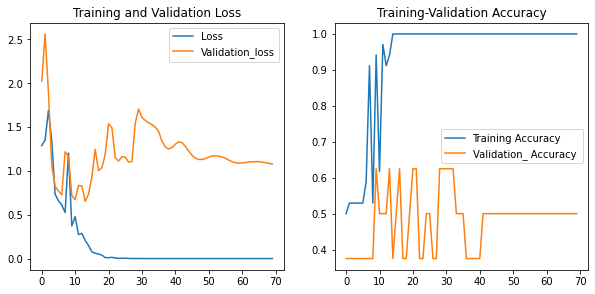

In [8]:
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

#streamlit

In [9]:
! pip install -q streamlit

     |████████████████████████████████| 9.2 MB 32.7 MB/s 
     |████████████████████████████████| 4.7 MB 53.9 MB/s 
     |████████████████████████████████| 237 kB 69.6 MB/s 
     |████████████████████████████████| 182 kB 75.2 MB/s 
     |████████████████████████████████| 164 kB 69.9 MB/s 
     |████████████████████████████████| 78 kB 7.9 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 51 kB 7.2 MB/s 


In [10]:
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok

/drive/ngrok-ssh
--2022-10-10 05:45:38--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 18.205.222.128, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  2.38MB/s    in 12s     

2022-10-10 05:45:51 (1.09 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [11]:
!/ngrok authtoken 2Fud0KVvq9S56Na5IbL6NRnHZtZ_6KvuGdz8px9MHULrMeHWf

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [12]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 31.0 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=d4068894b9cec3cbd69b5123d978c0ea2c2c0d3b7a50abcc58c94c6fe0c93f8b
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [13]:
from pyngrok import ngrok
#Publish Web App (Run this again whenever you make changes)
public_url = ngrok.connect(port='80')
print (public_url)
! streamlit run --server.port 80 app.py

NgrokTunnel: "http://3c83-34-87-123-161.ngrok.io" -> "http://localhost:80"
2022-10-10 05:46:06.527 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
Usage: streamlit run [OPTIONS] TARGET [ARGS]...

Error: Invalid value: File does not exist: app.py


In [14]:
import tensorflow as tf

# ====== Save model ========
model.save("model.h5")

# ====== Load model ========
tf.keras.models.load_model("model.h5")

In [15]:
model = tf.keras.models.load_model("model.h5")

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 227, 227, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 227, 227, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 113, 113, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [17]:
model.input_shape

(None, 227, 227, 3)

In [19]:
import cv2
import streamlit as st
import numpy as np
f = st.file_uploader("Upload Image")

  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2022-10-10 05:46:51.009 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [20]:
!streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py 

2022-10-10 05:46:55.820 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 829, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 782, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 1259, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 1066, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 610, in invoke
    return callback(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/streamlit/web/cli.py", line 205, in main_run
    _main_run(target, args, flag_options=kwargs)
  File "/usr/local/lib/python3.7/dist

In [21]:
if f is not None: 
  file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
  image = cv2.imdecode(file_bytes, 1)
  st.image(image, channels="BGR")

Shape of image:
(1509, 1170, 3)
Maximum value in the image: 
255
Minimum value in the image:
0



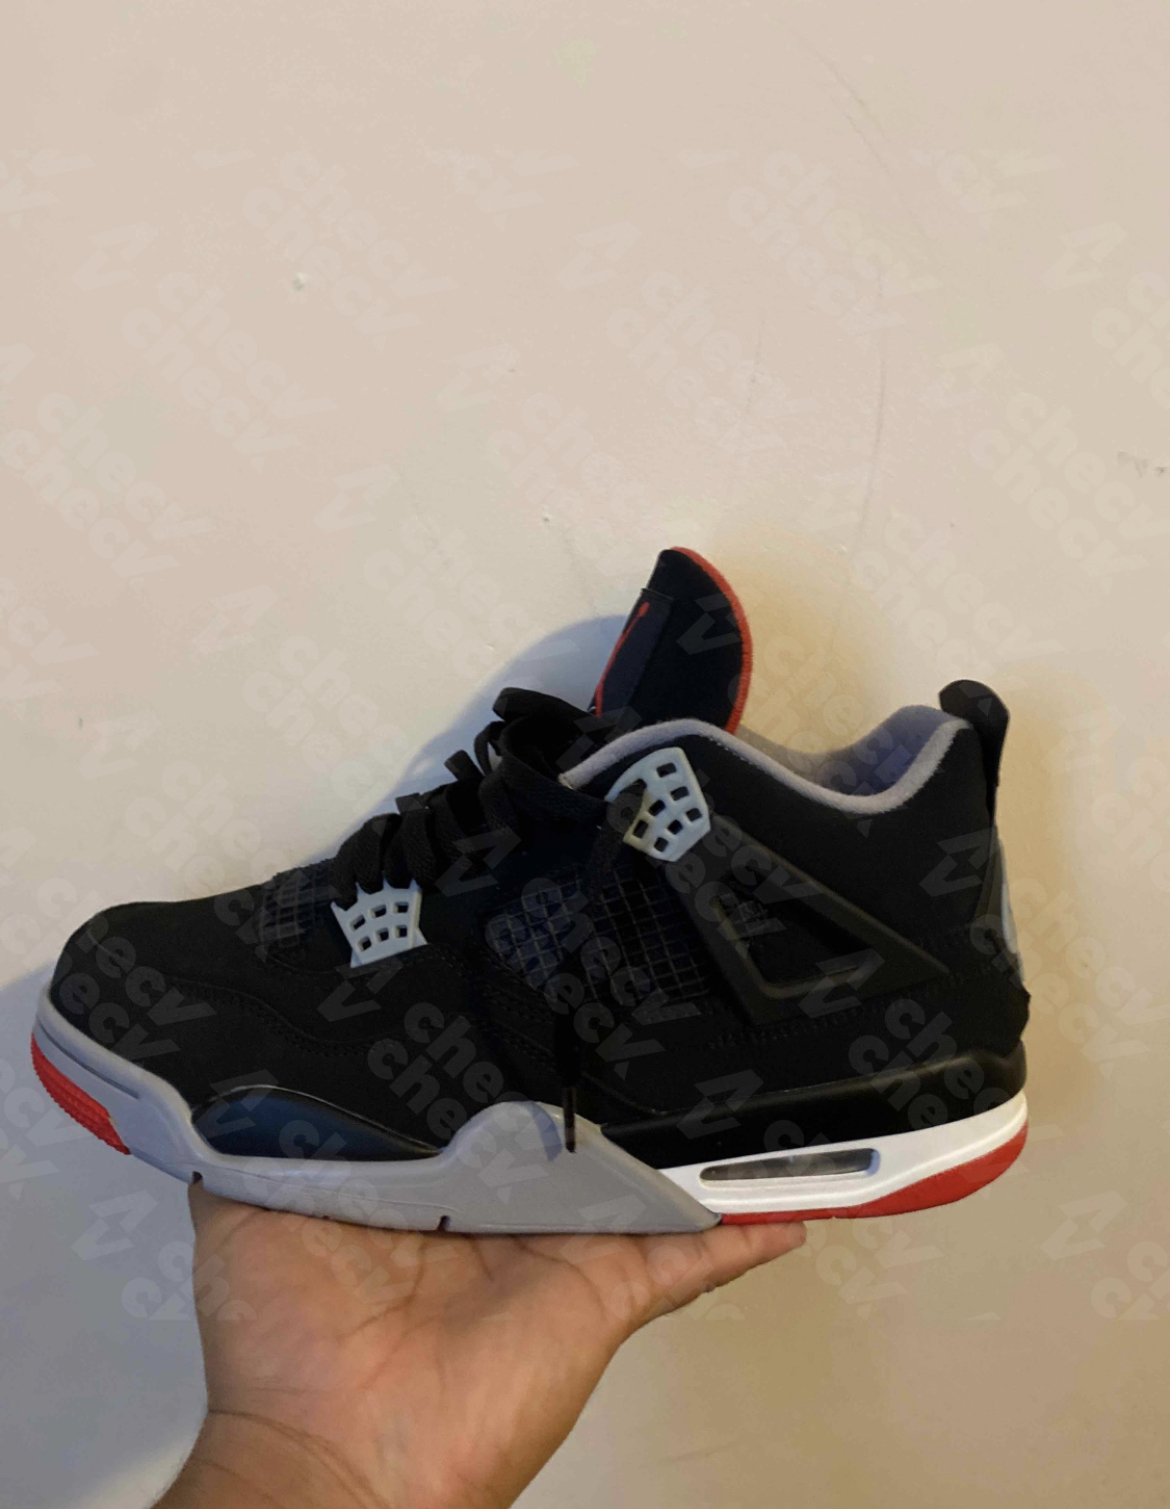

In [23]:
with open("/content/drive/MyDrive/shoedataset/Fake/IMG_9368.PNG", "rb") as f:
  file_bytes = np.asarray(bytearray(f.read()))
  image = cv2.imdecode(file_bytes, 1)
import plotly.express as px
print("Shape of image:")
print(image.shape)
print(f"Maximum value in the image: ")
print(image.max())
print("Minimum value in the image:")
print(image.min())

# Here we convert to RGB because our plotting function takes in RGB images
px.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

(227, 227, 3)



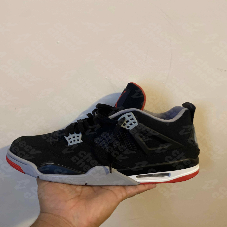

In [24]:
resized = cv2.resize(image, (227, 227), interpolation=cv2.INTER_LANCZOS4)
print(resized.shape)
px.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

In [25]:
gray_1d = np.mean(resized, axis=-1)
gray = np.zeros_like(resized)
gray[:,:,0] = gray_1d
gray[:,:,1] = gray_1d
gray[:,:,2] = gray_1d


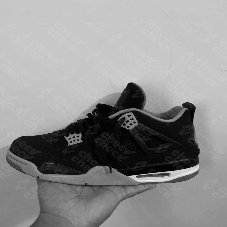

In [26]:
px.imshow(gray)


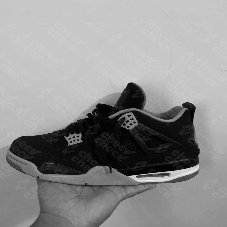

In [27]:
normalized = gray/255
px.imshow(normalized)

In [28]:
print("Shape of image:")
print(normalized.shape)
print(f"Maximum value in the image: ")
print(normalized.max())
print("Minimum value in the image:")
print(normalized.min())

Shape of image:
(227, 227, 3)
Maximum value in the image: 
0.9450980392156862
Minimum value in the image:
0.0


In [29]:
OPTIONS = ['Fake', 'Real']

In [30]:
model_input = np.expand_dims(normalized,0)
scores = model.predict(model_input)
scores

array([[-4.5105267, -0.9604441]], dtype=float32)

In [31]:
  df = pd.DataFrame()
  df["Options"] = OPTIONS
  df["Scores"] = scores.flatten()
  px.bar(df, x='Options', y='Scores', title="Model scores for each type")

In [32]:
prediction = OPTIONS[scores.argmax()]
print(prediction)

Real


#combined method

In [33]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 33.8 MB/s 
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.11
    Uninstalling google-api-python-client-1.12.11:
      Successfully uninstalled google-api-python-client-1.12.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.8.0 req

In [34]:
!pip install st-btn-select

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 503 kB 26.9 MB/s 


In [35]:
#@title Run this cell to initialize your website!
%%writefile app.py
import streamlit as st
from joblib import load
import numpy as np
import cv2
from datetime import datetime
from keras.models import load_model
import streamlit as st
import numpy as np
import glob
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
import keras
from datetime import date
from st_btn_select import st_btn_select

selection = st_btn_select(('CHECK YOUR SHOES', 'ABOUT'))

if selection == 'CHECK YOUR SHOES':
    
    st.title("Shoethentic")
    st.header("Created by Julia Huang & Justin Huang")
    st.header("Detect if your shoes are fake or not via AI!")
    st.subheader("Quick and easy; you only need to upload images to receive an automatic result!")



    image = st.file_uploader(label = "Upload an image for analysis:", type = ['png', 'jpg', 'jpeg', 'tif', 'tiff', 'raw', 'webp'])

    def import_and_predict(image_data, model):
        size = (227, 227)
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        img = tf.keras.utils.img_to_array(image)
        img = tf.expand_dims(img, 0)
        probs = model.predict(img)
        score = tf.nn.softmax(probs[0])
        text = ("Shoethentic predicts that this is an image of **{} shoe with {:.2f}% confidence**."
        .format(class_names[np.argmax(score)], 100 * np.max(score)))
        return text

    loaded_model = tf.keras.models.load_model('model.h5')
    class_names = ['Fake', 'Real']

    predictionText = "Prediction: Waiting for an image upload"

    if image is not None:
        st.image(image)
        predictionText = (import_and_predict(Image.open(image), loaded_model))

    st.markdown(predictionText)    

    

if selection == 'ABOUT':
    st.title("About")
   
    st.subheader("About the Creator")
    st.markdown("Shoethentic's web app and model is built by Julia Huang, a current student and developer at Sire, and the dataset is created by Justin Huang.")

    st.subheader("Mission")
    st.markdown("Due to the high prevalence of counterfeit shoe production, the goal of **Shoethentic** is to provide the sneakerhead community an opportunity to check the authenticity of each and every shoe they buy. **Shoethentic** aims to make this checking process simpler and more convenient by utilizing AI & machine learning.")
    st.subheader("How Shoethentic was Built")
  
    st.markdown("Shoethentic has two parts: the AI model and web app. The AI model is built using the TensorFlow framework while the web app is built using Streamlit. We trained the model on a dataset consisting of fake and real shoe images sourced from the CheckCheck mobile app.")
 
    st.subheader("Future of Shoethentic")
    st.markdown("We plan to improve the accuracy of the AI model even more when checking for shoes and integrate it into the Sire website later on.")

Writing app.py


In [37]:
from pyngrok import ngrok
#Publish Web App (Run this again whenever you make changes)
public_url = ngrok.connect(port='80')
print (public_url)
! streamlit run --server.port 80 app.py

INFO:pyngrok.ngrok:Opening tunnel named: http-80-b9ec118d-fdcc-445a-8904-12e8593fe9b0
2022-10-10 05:48:52.373 Opening tunnel named: http-80-b9ec118d-fdcc-445a-8904-12e8593fe9b0
INFO:pyngrok.process.ngrok:t=2022-10-10T05:48:52+0000 lvl=info msg=start pg=/api/tunnels id=2ad78724de0ba1dc
2022-10-10 05:48:52.385 t=2022-10-10T05:48:52+0000 lvl=info msg=start pg=/api/tunnels id=2ad78724de0ba1dc
2022-10-10 05:48:53.132 t=2022-10-10T05:48:53+0000 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=2ad78724de0ba1dc err="Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2Fvm7cTEZwfhGnmsQ2rJoINbV3P, tn_2Fvm7gPE93TfKqaRVejH22eWmFw, tn_2FvmSgImhs56FDzwYL5qmBiZIPR\n\r\n\r\nERR_NGROK_324\r\n"
INFO:pyngrok.process.ngrok:t=2022-10-10T05:48:53+0000 lvl=info msg=end pg=/api/tunnels id=2ad78724de0ba1dc status=502 dur=731.383629ms
2022-10-10 05:48:53.159 t=2022-10-10T05:48:53+0000 lvl=info msg=end pg=/api/tunnels id=2a

PyngrokNgrokHTTPError: ignored

In [42]:
!kill port='80'

/bin/bash: line 0: kill: port=80: arguments must be process or job IDs
